In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import sparse

%matplotlib inline

# Load adata & csv

1. Run brain1_vs_brain3_gene_qc.ipynb to generate ../results/Brain_1_3_TH_ZI_geneQC.h5ad

In [2]:
# will need to run brain1_vs_brain3_gene_qc.ipynb to generate this file if on a
# new codeocean run
adata_qc = ad.read_h5ad('/root/capsule/results/Brain_1_3_TH_ZI_geneQC.h5ad')

In [3]:
adata_qc

AnnData object with n_obs × n_vars = 606012 × 276
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'barcodeCount', 'corrected_x', 'corrected_y', 'origin', 'rotation', 'section', 'animal', 'merscope', 'target_atlas_plate', 'codebook', 'min_genes', 'min_total_reads', 'min_vol', 'genes_detected', 'total_reads', 'total_blanks', 'spot_density', 'max_blank_count', 'blanks_detected', 'cell_qc', 'best.cl', 'cluster_label', 'cluster_id', 'Level1_id_label', 'Level2_id_label', 'class_id_label', 'clean_region_label', 'prob', 'avg.dist', 'avg.path.cor', 'avg.cor', 'cor.zscore', 'division_id_label', 'subclass_id_label', 'supertype_id_label', 'napari_x', 'napari_y', 'is_in_TH_or_ZI'
    uns: 'gene_qc_flags', 'mean_diff_plot_results_flags'
    obsm: 'X_tSNE', 'spatial', 'spatial_cirro', 'spatial_rotated'
    layers: 'log2p', 'raw'

In [4]:
adata_qc.uns['mean_diff_plot_results_flags']

,b1b3_diff_95pctReads_allCells,b1_flagged_95pctReads_allCells,b3_flagged_95pctReads_allCells,b1b3_diff_99pctLogReads_allCells,b1_flagged_99pctLogReads_allCells,b3_flagged_99pctLogReads_allCells,b1b3_diff_99pctLogReads_neurons,b1_flagged_99pctLogReads_neurons,b3_flagged_99pctLogReads_neurons,b1b3_diff_99pctLogReads_nn,...,b3_flagged_99pctLogReads_nn,b1b3_diff_99pctLogReads_exc,b1_flagged_99pctLogReads_exc,b3_flagged_99pctLogReads_exc,b1b3_diff_99pctLogReads_inh,b1_flagged_99pctLogReads_inh,b3_flagged_99pctLogReads_inh,b1b3_diff_95pctReads_diffAsPctOfMean_allCells,b1_flagged_95pctReads_diffAsPctOfMean_allCells,b3_flagged_95pctReads_diffAsPctOfMean_allCells
Trhde,-0.675785,False,False,-0.440102,False,False,-0.385731,False,False,-0.245763,...,False,-0.388188,False,False,-0.374968,False,False,-43.313288,False,False
Grp,0.248069,False,False,-0.000856,False,False,-0.121797,False,False,0.195647,...,False,-0.150862,False,False,-0.086431,False,False,-0.085552,False,False
Calcr,0.779578,False,False,0.273323,False,False,0.291019,False,False,0.239820,...,False,0.262532,False,False,0.359328,False,False,27.163437,False,False
Gad2,-0.368328,False,False,-0.033509,False,False,-0.021409,False,False,0.080565,...,False,-0.056860,False,False,-0.015975,False,False,-3.350547,False,False
Pth2r,0.126687,False,False,0.178649,False,False,0.234005,False,False,0.090146,...,False,0.227384,False,False,0.112199,False,False,17.817510,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rxfp1,0.467413,False,False,-0.257056,False,False,-0.327628,False,False,0.395913,...,False,-0.359911,False,False,0.705603,False,True,-25.565016,False,False
Rmst,-0.881739,False,False,-0.281724,False,False,-0.259001,False,False,-0.257162,...,False,-0.261870,False,False,-0.244039,False,False,-27.987534,False,False
Gal,0.057899,False,False,-0.080842,False,False,-0.126114,False,False,0.018983,...,False,-0.120337,False,False,-0.182263,False,False,-8.079840,False,False
Adgrf5,-0.284250,False,False,-0.102807,False,False,0.093523,False,False,-0.181750,...,False,0.099417,False,False,-0.394084,False,False,-10.271652,False,False


In [5]:
# Load csv from Brian
wmb_prelim_genes_csv = pd.read_csv('/root/capsule/resources/brain3_PreliminaryGeneList_testmousewb_fromBrian.csv')

In [6]:
# set the index to the gene name to make indexing/subsetting easier
wmb_prelim_genes_csv.set_index("Vizgen Gene", inplace=True)
wmb_prelim_genes_csv

,Gene Input,Ensemble ID,Transcript,Notes,Abundance,Target Regions,Type
Vizgen Gene,,,,,,,
Igf2,ENSMUST00000000033,ENSMUSG00000048583,ENSMUST00000000033,NaN,16.476564,58,MERFISH
Ccnd2,ENSMUST00000000188,ENSMUSG00000000184,ENSMUST00000000188,NaN,10.042047,166,MERFISH
Th,ENSMUST00000000219,ENSMUSG00000000214,ENSMUST00000000219,NaN,8.665689,56,MERFISH
Lhx2,ENSMUST00000000253,ENSMUSG00000000247,ENSMUST00000000253,NaN,9.807290,51,MERFISH
Glra3,ENSMUST00000000275,ENSMUSG00000038257,ENSMUST00000000275,NaN,2.093097,130,MERFISH
...,...,...,...,...,...,...,...
Cdkn1a,ENSMUST00000233296,ENSMUSG00000023067,ENSMUST00000233296,NaN,9.571591,63,MERFISH
Qpct,ENSMUST00000233916,ENSMUSG00000024084,ENSMUST00000233916,NaN,3.524749,57,MERFISH
Zfp521,ENSMUST00000234410,ENSMUSG00000024420,ENSMUST00000234410,NaN,2.637196,61,MERFISH


## Find list of overlapping genes

In [8]:
# figure out which genes are in both the csv & the ad.uns
genes_csv = sorted(wmb_prelim_genes_csv.index.tolist())
genes_ad = sorted(adata_qc.uns['mean_diff_plot_results_flags'].index.tolist())
genes_both = sorted(list(set(genes_csv) & set(genes_ad)))

print(f'{len(genes_csv)=}')
print(f'{len(genes_ad)=}')
print(f'{len(genes_both)=}')

if set(genes_ad).issubset(set(genes_csv)):
    genes = genes_ad
else:
    genes = genes_both
    
# print(genes)

len(genes_csv)=500
len(genes_ad)=226
len(genes_both)=226


## Subset to just those genes

In [9]:
# subset both to be just the genes we want
mean_diff_plot_results_df = adata_qc.uns['mean_diff_plot_results_flags'].loc[genes,:]
mean_diff_plot_results_df

,b1b3_diff_95pctReads_allCells,b1_flagged_95pctReads_allCells,b3_flagged_95pctReads_allCells,b1b3_diff_99pctLogReads_allCells,b1_flagged_99pctLogReads_allCells,b3_flagged_99pctLogReads_allCells,b1b3_diff_99pctLogReads_neurons,b1_flagged_99pctLogReads_neurons,b3_flagged_99pctLogReads_neurons,b1b3_diff_99pctLogReads_nn,...,b3_flagged_99pctLogReads_nn,b1b3_diff_99pctLogReads_exc,b1_flagged_99pctLogReads_exc,b3_flagged_99pctLogReads_exc,b1b3_diff_99pctLogReads_inh,b1_flagged_99pctLogReads_inh,b3_flagged_99pctLogReads_inh,b1b3_diff_95pctReads_diffAsPctOfMean_allCells,b1_flagged_95pctReads_diffAsPctOfMean_allCells,b3_flagged_95pctReads_diffAsPctOfMean_allCells
Abi3bp,-0.618806,False,False,-0.117288,False,False,-0.170371,False,False,-0.029059,...,False,-0.189553,False,False,-0.075586,False,False,-11.715405,False,False
Acta2,-0.087570,False,False,-0.220639,False,False,-0.072990,False,False,-0.147671,...,False,-0.106455,False,False,0.036247,False,False,-21.974842,False,False
Adcy2,-0.415016,False,False,-0.085618,False,False,-0.076325,False,False,0.030537,...,False,-0.125364,False,False,-0.023715,False,False,-8.556591,False,False
Adgrf5,-0.284250,False,False,-0.102807,False,False,0.093523,False,False,-0.181750,...,False,0.099417,False,False,-0.394084,False,False,-10.271652,False,False
Aqp4,-0.091786,False,False,-0.032981,False,False,-0.078517,False,False,-0.036974,...,False,-0.084592,False,False,-0.087574,False,False,-3.297769,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whrn,0.397815,False,False,0.088850,False,False,0.088440,False,False,0.124894,...,False,0.118965,False,False,0.078186,False,False,8.879168,False,False
Zeb2,-1.229312,False,False,-0.555738,False,False,-0.590043,False,False,-0.538340,...,False,-0.520874,False,False,-0.603631,False,False,-54.186369,False,False
Zfhx4,-0.379834,False,False,-0.055870,False,False,-0.035706,False,False,0.002794,...,False,-0.078507,False,False,-0.006536,False,False,-5.585592,False,False
Zfpm2,-0.610830,False,False,-0.232428,False,False,-0.202157,False,False,-0.175678,...,False,-0.253637,False,False,-0.149871,False,False,-23.138758,False,False


In [10]:
# subset both to be just the genes we want
blank_qc_df = adata_qc.uns['gene_qc_flags'].loc[genes,:]
blank_qc_df

,below_blanks_all_cells_brain1,below_blanks_all_cells_brain3,below_blanks_in_neurons_brain1,below_blanks_in_neurons_brain3,below_blanks_in_nn_brain1,below_blanks_in_nn_brain3,below_blanks_in_exc_brain1,below_blanks_in_exc_brain3,below_blanks_in_inh_brain1,below_blanks_in_inh_brain3
Abi3bp,True,False,True,False,False,False,True,False,True,True
Acta2,False,False,False,False,False,False,False,False,False,False
Adcy2,False,False,False,False,False,False,False,False,False,False
Adgrf5,False,False,False,False,False,False,False,False,False,False
Aqp4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
Whrn,False,False,False,False,False,False,False,False,False,False
Zeb2,False,False,False,False,False,False,False,False,False,False
Zfhx4,False,False,False,False,False,False,False,False,False,False
Zfpm2,False,False,False,False,False,False,False,False,False,False


In [11]:
wmb_df = wmb_prelim_genes_csv.loc[genes,:]
wmb_df

,Gene Input,Ensemble ID,Transcript,Notes,Abundance,Target Regions,Type
Vizgen Gene,,,,,,,
Abi3bp,ENSMUST00000096012,ENSMUSG00000035258,ENSMUST00000096012,NaN,1.982109,124,MERFISH
Acta2,ENSMUST00000039631,ENSMUSG00000035783,ENSMUST00000039631,NaN,7.191772,53,MERFISH
Adcy2,ENSMUST00000022013,ENSMUSG00000021536,ENSMUST00000022013,NaN,19.590622,125,MERFISH
Adgrf5,ENSMUST00000225962,ENSMUSG00000056492,ENSMUST00000225962,NaN,2.276930,68,MERFISH
Aqp4,ENSMUST00000238946,ENSMUSG00000024411,ENSMUST00000238946,NaN,22.365412,140,MERFISH
...,...,...,...,...,...,...,...
Whrn,ENSMUST00000095037,ENSMUSG00000039137,ENSMUST00000095037,NaN,3.068139,64,MERFISH
Zeb2,ENSMUST00000176438,ENSMUSG00000026872,ENSMUST00000176438,NaN,6.083433,81,MERFISH
Zfhx4,ENSMUST00000176383,ENSMUSG00000025255,ENSMUST00000176383,NaN,0.954112,389,MERFISH


# Plot csv data

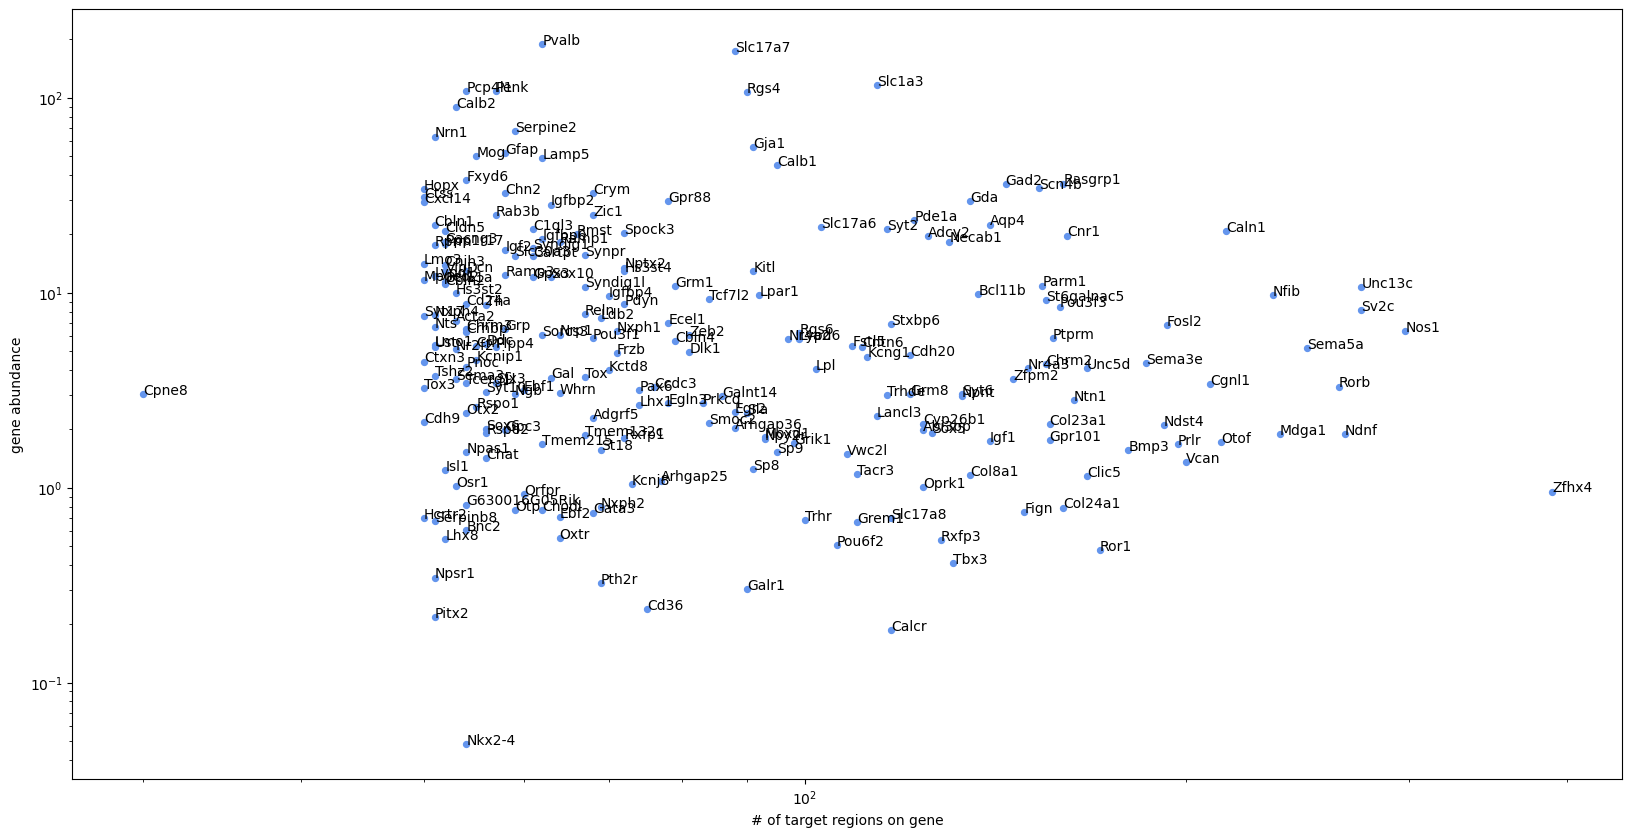

In [12]:
# Plot gene # of probe target regions vs gene abundance
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
sc = ax.scatter(wmb_df['Target Regions'], 
                wmb_df['Abundance'],
                s=18, color='cornflowerblue')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('gene abundance')
ax.set_xlabel('# of target regions on gene')


for gene in wmb_df.index.tolist():
    curr_row = wmb_df[wmb_df.index==gene]
    ax.annotate(gene, (curr_row['Target Regions'], curr_row['Abundance']), 
                fontsize=10, color='k')
    
plt.show()

# Plot target regions vs QC metrics

## Blank metrics

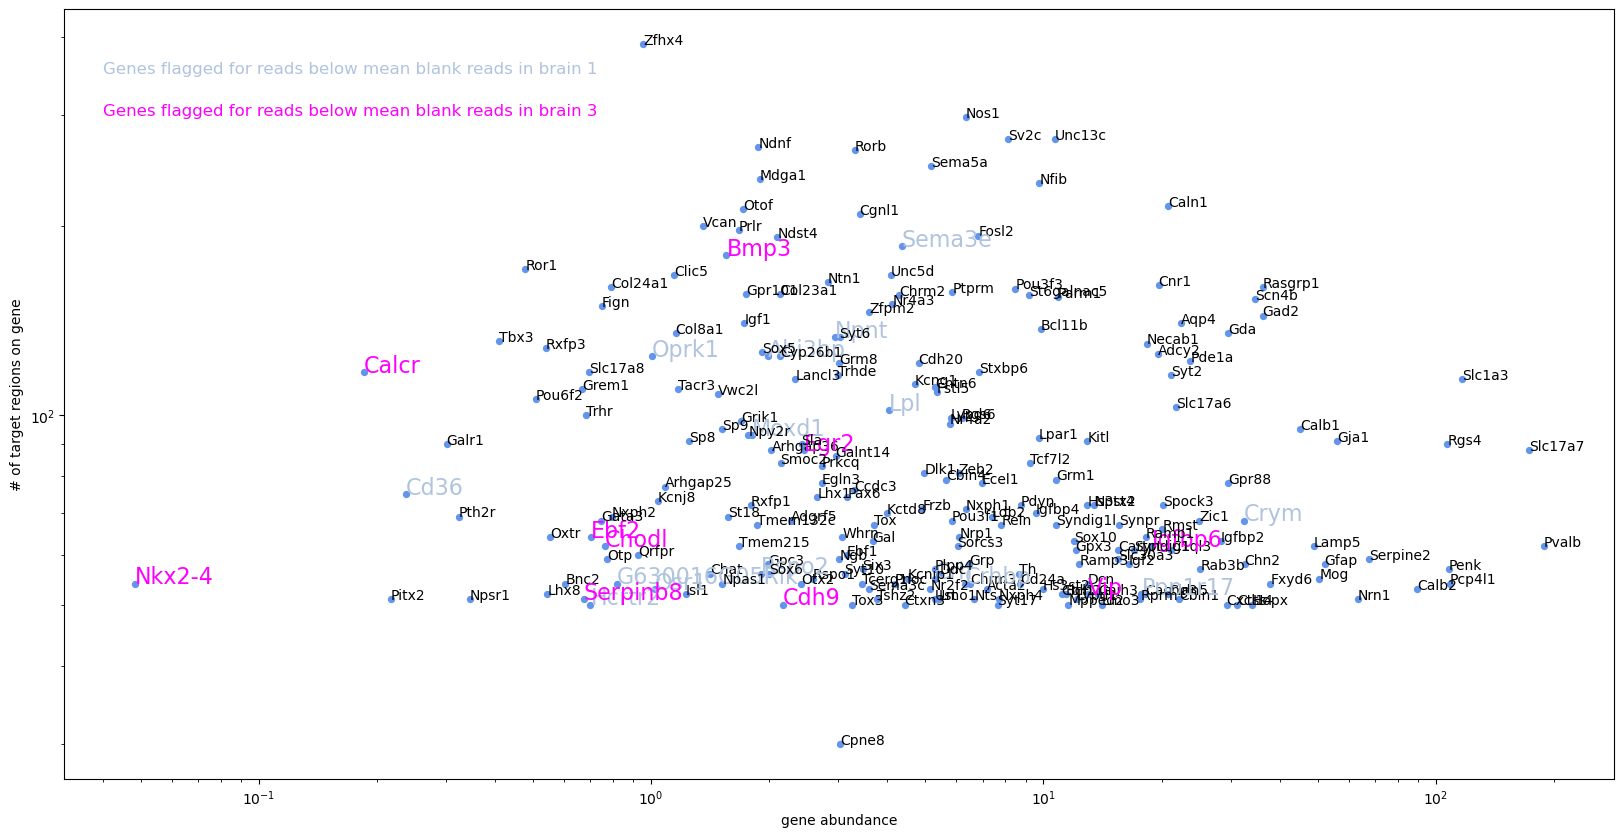

In [17]:
# Plot gene # of probe target regions vs gene abundance
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
sc = ax.scatter(wmb_df['Abundance'], wmb_df['Target Regions'],
                s=18, color='cornflowerblue')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('gene abundance')
ax.set_ylabel('# of target regions on gene')


for gene in wmb_df.index.tolist():
    curr_row_csv = wmb_df[wmb_df.index==gene]
    curr_row_ad = blank_qc_df[blank_qc_df.index==gene]
    
    if curr_row_ad['below_blanks_all_cells_brain3'].bool():
            color = 'magenta'
            fontsize=16
    elif curr_row_ad['below_blanks_all_cells_brain1'].bool():
        color = 'lightsteelblue'
        fontsize=16
    else:
        color = 'k'
        fontsize=10
            
    ax.annotate(gene, (curr_row_csv['Abundance'], curr_row_csv['Target Regions']), 
                fontsize=fontsize, color=color)

ax.annotate('Genes flagged for reads below mean blank reads in brain 1', 
            (0.04, 350), 
            fontsize=12, color='lightsteelblue')
ax.annotate('Genes flagged for reads below mean blank reads in brain 3', 
            (0.04, 300), 
            fontsize=12, color='magenta')
    
plt.show()

## Mean-difference plot metrics

In [14]:
# Plot gene # of probe target regions vs mean diff plot results column
data_col = ['b1b3_diff_95pctReads_allCells', 
            'b1b3_diff_99pctLogReads_allCells',
            'b1b3_diff_99pctLogReads_neurons',
            'b1b3_diff_99pctLogReads_nn',
            'b1b3_diff_99pctLogReads_exc',
            'b1b3_diff_99pctLogReads_inh',
            'b1b3_diff_95pctReads_diffAsPctOfMean_allCells'
           ]
flag_col_b3 = ['b3_flagged_95pctReads_allCells', 
               'b3_flagged_99pctLogReads_allCells',
               'b3_flagged_99pctLogReads_neurons',
               'b3_flagged_99pctLogReads_nn',
               'b3_flagged_99pctLogReads_exc',
               'b3_flagged_99pctLogReads_inh',
               'b3_flagged_95pctReads_diffAsPctOfMean_allCells'
              ]
flag_col_b1 = ['b1_flagged_95pctReads_allCells', 
               'b1_flagged_99pctLogReads_allCells',
               'b1_flagged_99pctLogReads_neurons',
               'b1_flagged_99pctLogReads_nn',
               'b1_flagged_99pctLogReads_exc',
               'b1_flagged_99pctLogReads_inh',
               'b1_flagged_95pctReads_diffAsPctOfMean_allCells'
              ]

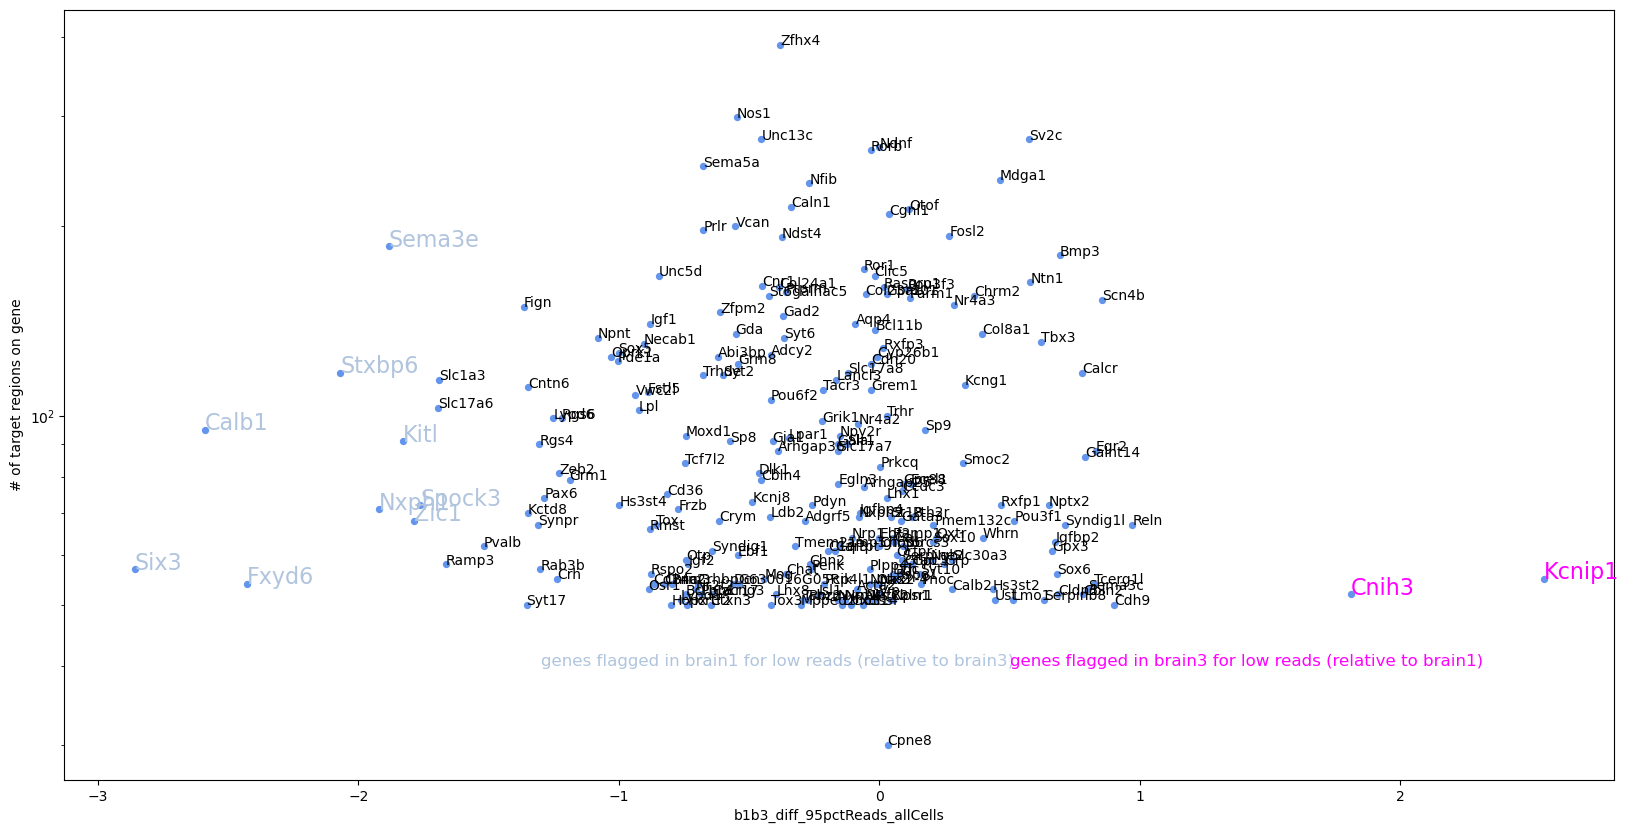

brain3 flagged genes: ['Cnih3', 'Kcnip1']


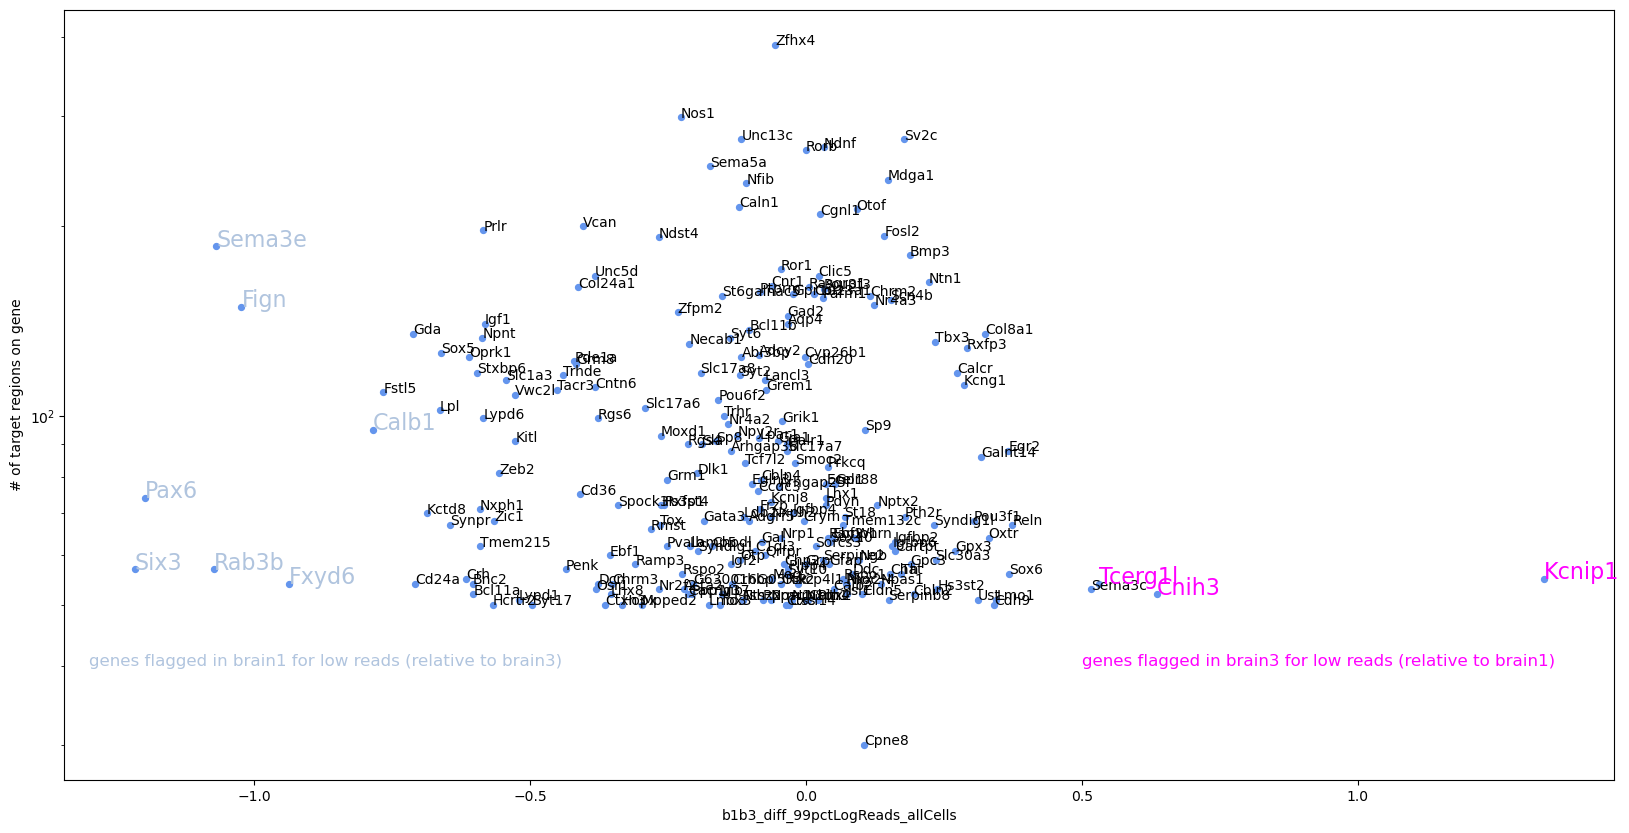

brain3 flagged genes: ['Cnih3', 'Kcnip1', 'Tcerg1l']


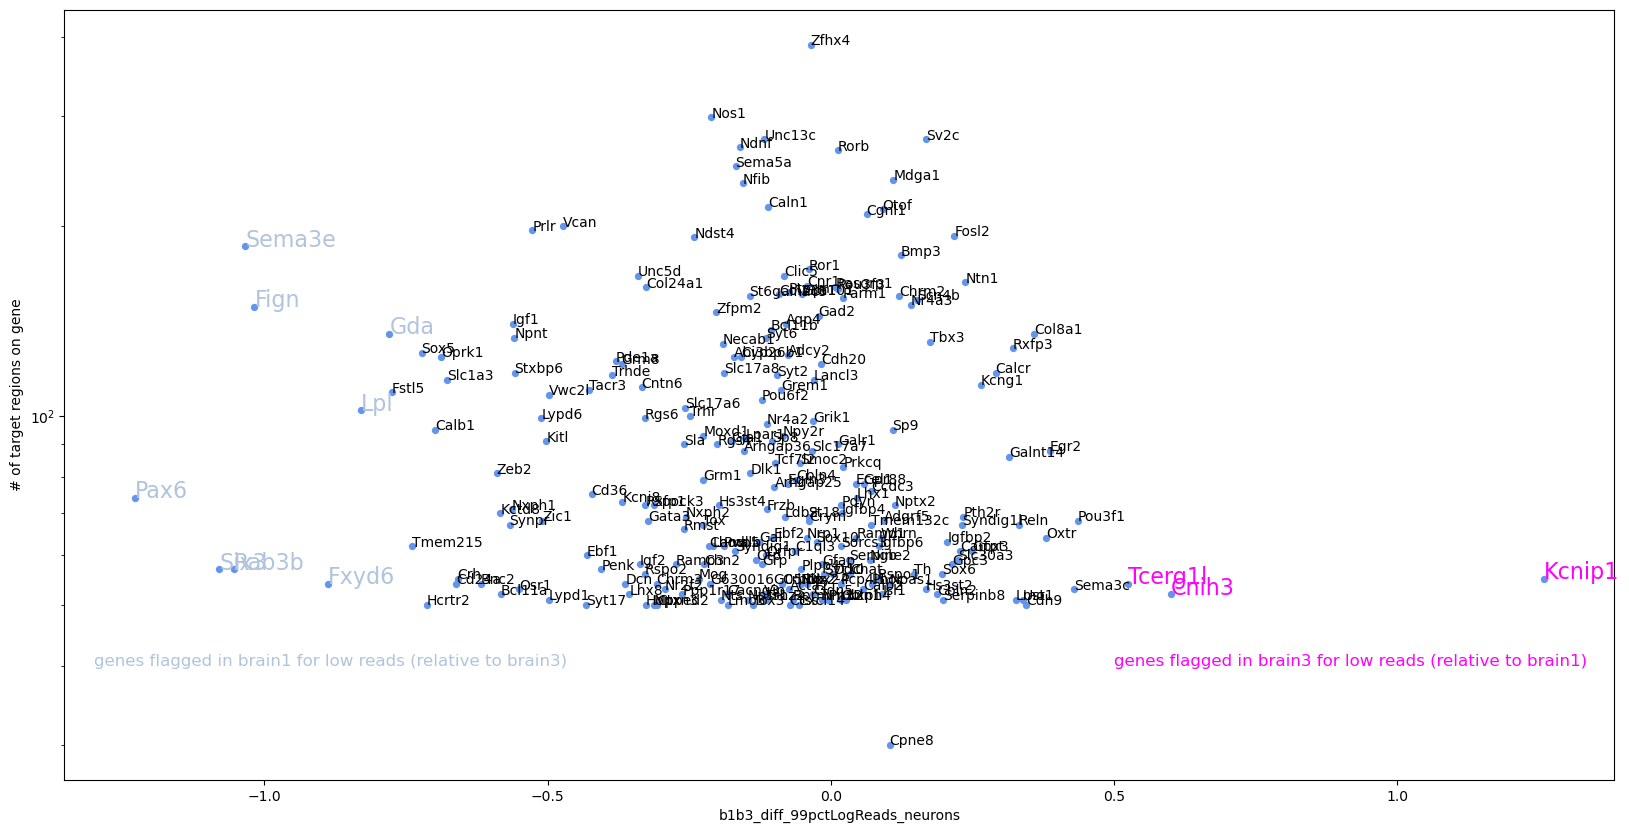

brain3 flagged genes: ['Cnih3', 'Kcnip1', 'Tcerg1l']


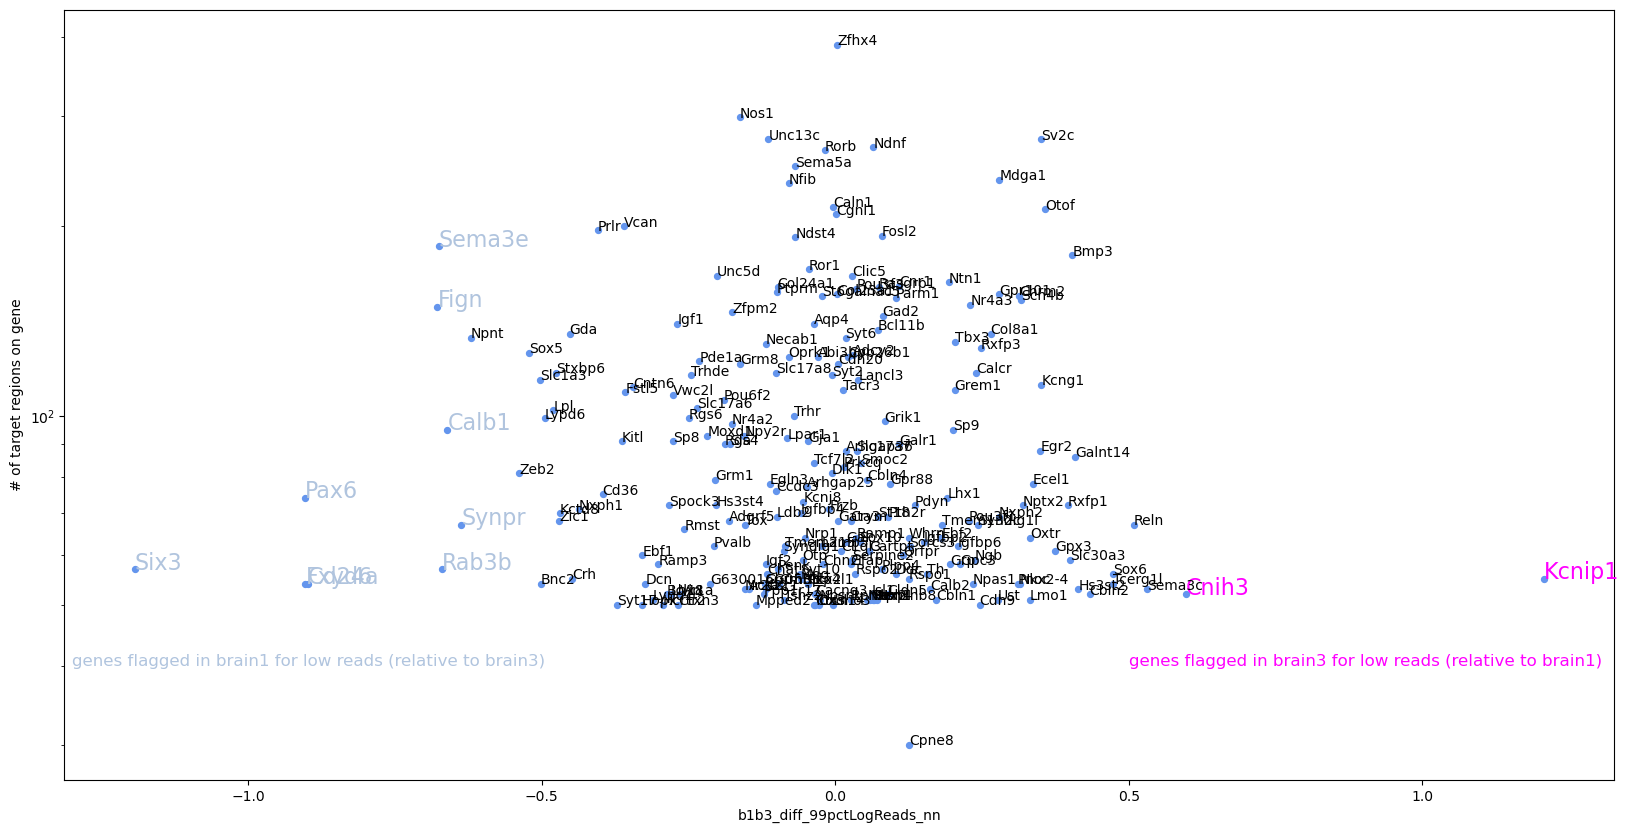

brain3 flagged genes: ['Cnih3', 'Kcnip1']


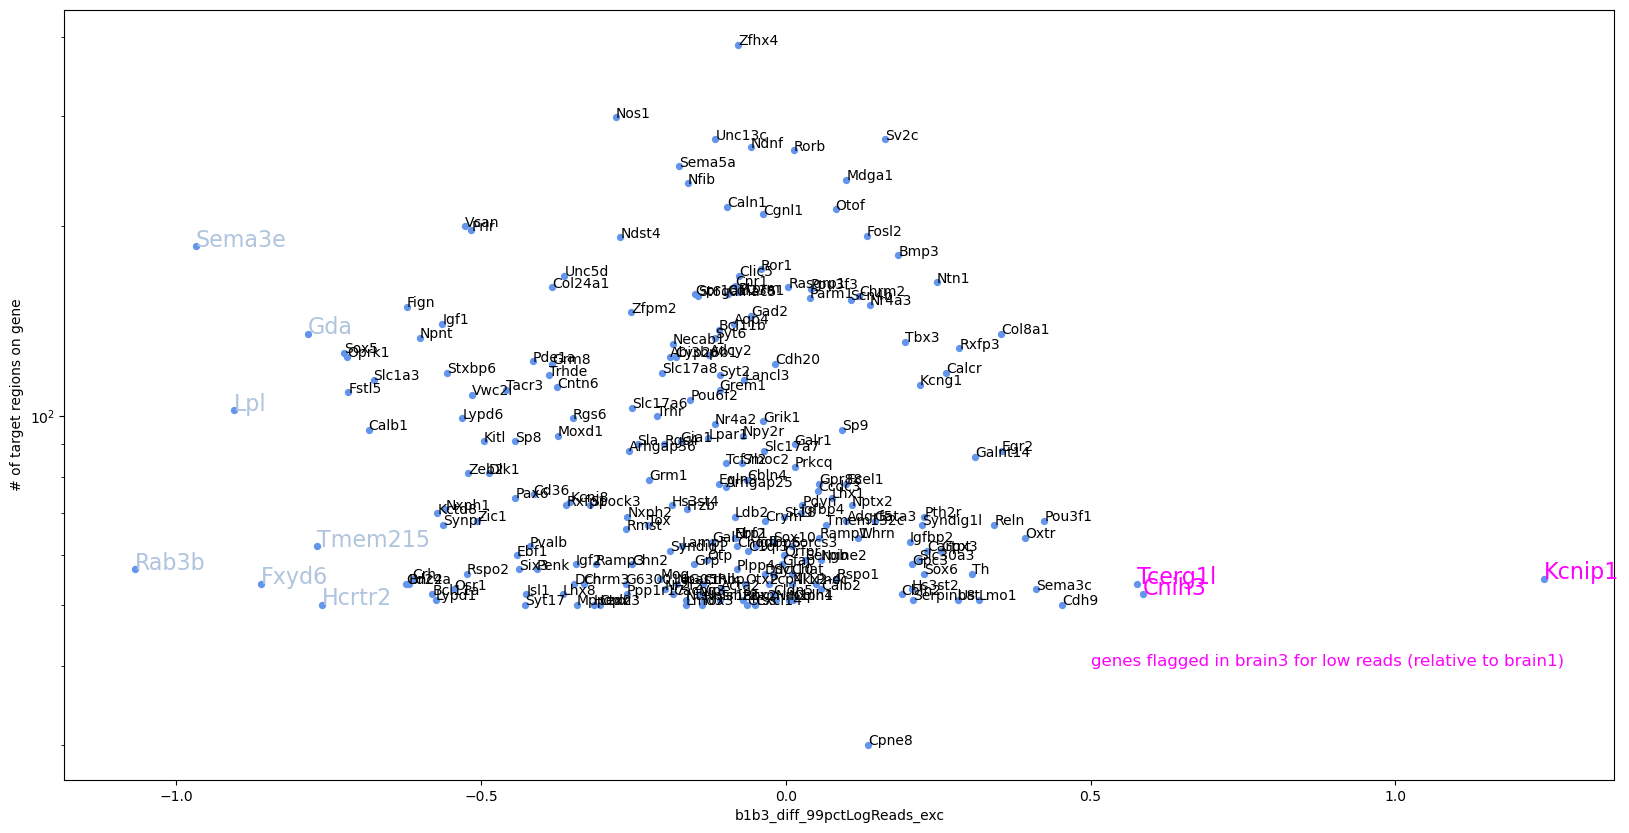

brain3 flagged genes: ['Cnih3', 'Kcnip1', 'Tcerg1l']


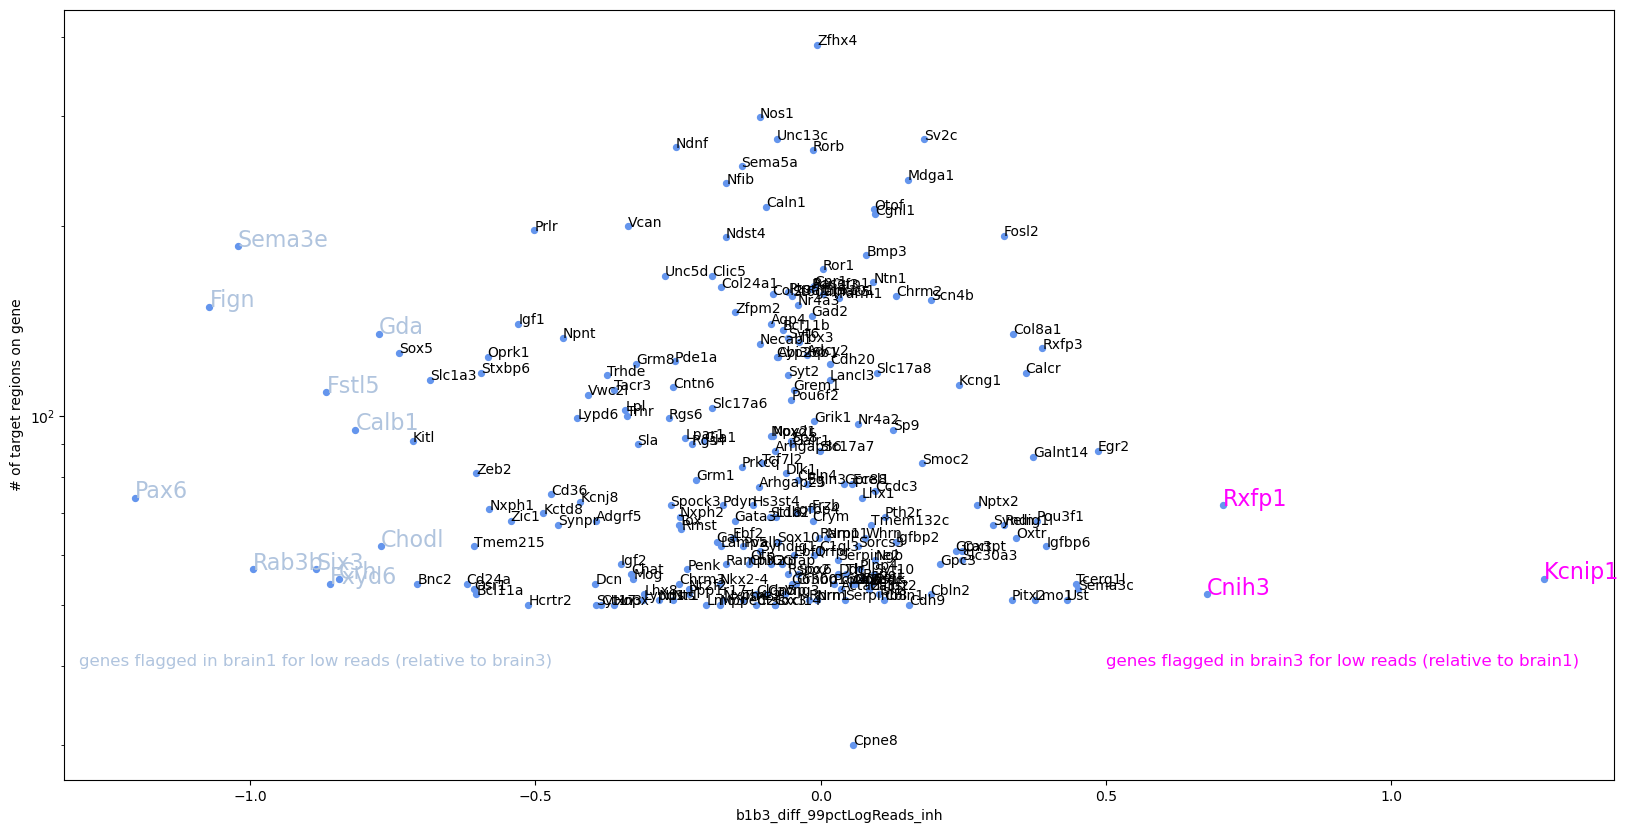

brain3 flagged genes: ['Cnih3', 'Kcnip1', 'Rxfp1']


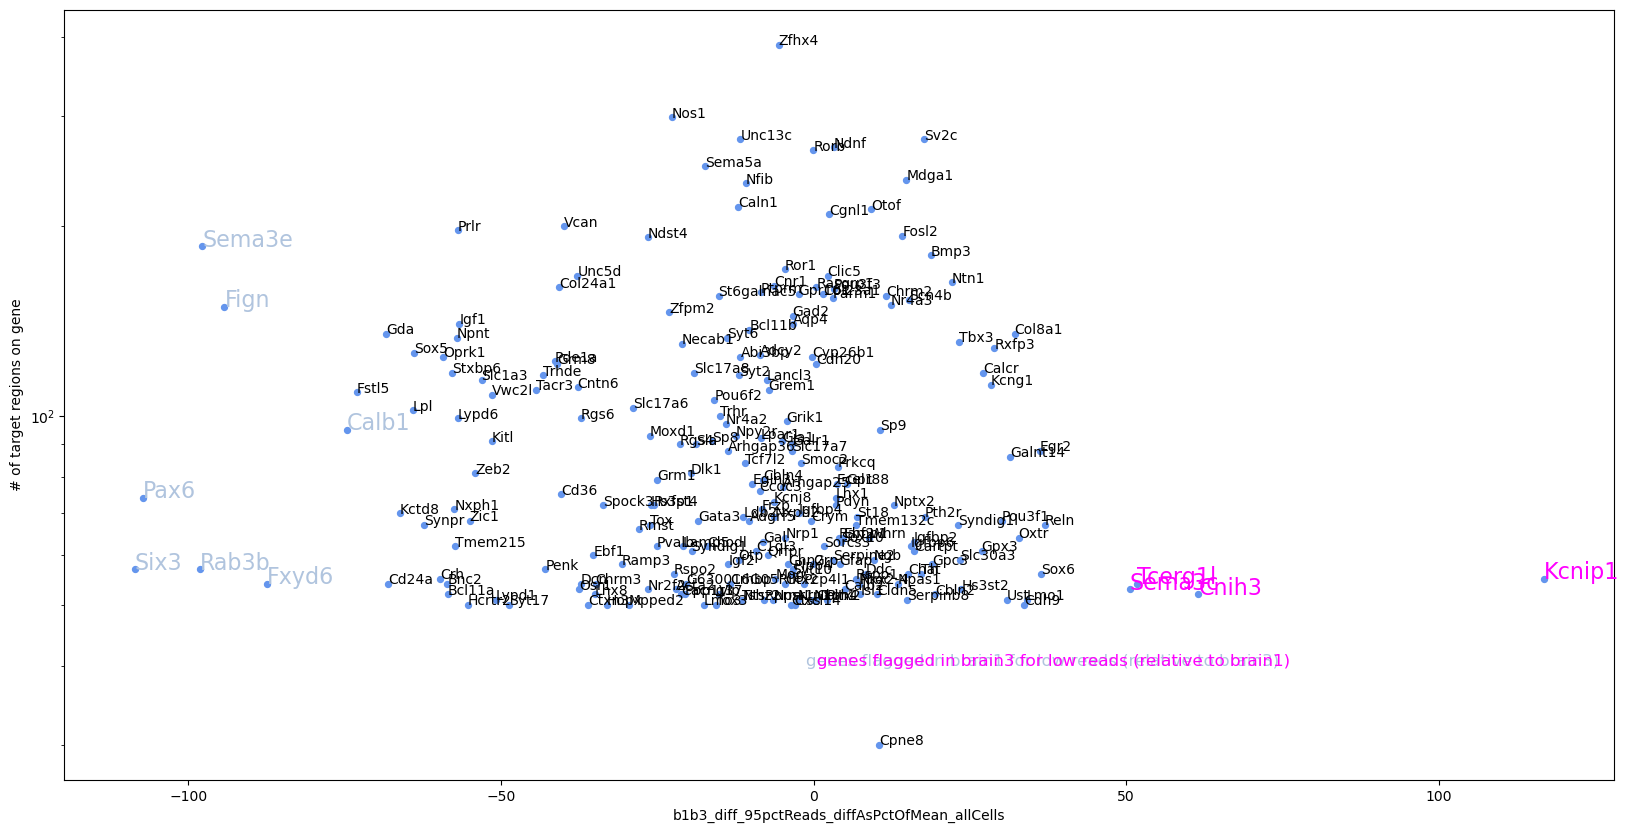

brain3 flagged genes: ['Cnih3', 'Kcnip1', 'Sema3c', 'Tcerg1l']


In [24]:
for i, col in enumerate(data_col):
    fig = plt.figure(figsize=(20,10))
    ax = plt.gca()

    sc = ax.scatter(mean_diff_plot_results_df[data_col[i]],
                    wmb_df['Target Regions'],
                    s=18, 
                    color='cornflowerblue')
    # ax.set_yscale('log')
    # ax.invert_xaxis()  # invert y-axis to have brain3 flagged genes in lower left
    ax.set_yscale('log')
    ax.set_xlabel(data_col[i])
    ax.set_ylabel('# of target regions on gene')


    for gene in genes:
        curr_row_csv = wmb_df[wmb_df.index==gene]
        curr_row_ad = mean_diff_plot_results_df[mean_diff_plot_results_df.index==gene]

        if curr_row_ad[flag_col_b3[i]].bool():
            color = 'magenta'
            fontsize=16
        elif curr_row_ad[flag_col_b1[i]].bool():
            color = 'lightsteelblue'
            fontsize=16
        else:
            color = 'k'
            fontsize=10
        ax.annotate(gene, (curr_row_ad[data_col[i]], curr_row_csv['Target Regions']), 
                    fontsize=fontsize, color=color)
    
    ax.annotate('genes flagged in brain1 for low reads (relative to brain3)', 
                (-1.3, 40), 
                fontsize=12, color='lightsteelblue')    
    ax.annotate('genes flagged in brain3 for low reads (relative to brain1)', 
                (0.5, 40), 
                fontsize=12, color='magenta')

    plt.show()
    
    print('brain3 flagged genes:', mean_diff_plot_results_df[mean_diff_plot_results_df[flag_col_b3[i]]].index.tolist())